# Python imports

In [1]:
# Show plots as part of the notebook (this is a Jupyter-specific operation)
%matplotlib inline
import time
import matplotlib.pyplot as plt
import requests
import xmltodict
# Standard library packages
import os

# Import Pandas and Seaborn
import pandas as pd
import seaborn as sns

# Import Biopython tools for running local BLASTX
from Bio.Blast.Applications import NcbiblastxCommandline
from Bio.Blast.Applications import NcbiblastnCommandline

In [2]:
from datetime import datetime
from pytz import timezone

now_time = datetime.now(timezone('America/Chicago'))
print(now_time.strftime('%I:%M:%S %p'))

10:30:40 PM


In [10]:
help(NcbiblastnCommandline)

Help on class NcbiblastnCommandline in module Bio.Blast.Applications:

class NcbiblastnCommandline(_NcbiblastMain2SeqCommandline)
 |  NcbiblastnCommandline(cmd='blastn', **kwargs)
 |  
 |  Wrapper for the NCBI BLAST+ program blastn (for nucleotides).
 |  
 |  With the release of BLAST+ (BLAST rewritten in C++ instead of C), the NCBI
 |  replaced the old blastall tool with separate tools for each of the searches.
 |  This wrapper therefore replaces BlastallCommandline with option -p blastn.
 |  
 |  For example, to run a search against the "nt" nucleotide database using the
 |  FASTA nucleotide file "m_code.fasta" as the query, with an expectation value
 |  cut off of 0.001, saving the output to a file in XML format:
 |  
 |  >>> from Bio.Blast.Applications import NcbiblastnCommandline
 |  >>> cline = NcbiblastnCommandline(query="m_cold.fasta", db="nt", strand="plus",
 |  ...                               evalue=0.001, out="m_cold.xml", outfmt=5)
 |  >>> cline
 |  NcbiblastnCommandline(

In [ ]:
#blastn -task blastn -query example/unknown.fa -db db/bacteria/bacteria_nucl -out example/blastn_bacteria.out

# Running and analyzing a local BLASTN search for Nov112020-ALL-R1.fasta

In [3]:
cmd_blastn = NcbiblastnCommandline(query='Nov112020-ALL-R1.fasta',
                      out='Nov112020-ALL-R1_blastn.tab',
                      outfmt=6,
                      db='db_ref_ALL_cat/db_ref_16s_ALL_cat',
                      num_threads = 64)

In [4]:
# Get a working command-line
print(cmd_blastn)

blastn -out Nov112020-ALL-R1_blastn.tab -outfmt 6 -query Nov112020-ALL-R1.fasta -db db_ref_ALL_cat/db_ref_16s_ALL_cat -num_threads 64


In [5]:
%%time
cmd_blastn()

CPU times: user 785 ms, sys: 659 ms, total: 1.44 s
Wall time: 4h 47min 58s


('', '')

In [ ]:
##https://widdowquinn.github.io/2018-03-06-ibioic/02-sequence_databases/03-programming_for_blast.html#runblastx
# Run BLASTX, and catch STDOUT/STDERR
# !! Do not execute cell if skipping computation !!
#stdout, stderr = cmd_blastn()

# Check STDOUT, STDERR
#print("STDOUT: %s" % stdout)
#print("STDERR: %s" % stderr)

# EDA for Results: "Nov112020-ALL-R1_blastn.tab"

In [2]:
# !! If you are skipping computational steps, uncomment the line below !!
#blastout = os.path.join('prepped', 'kitasatospora', 'AMK19_00175_blastx_kitasatospora.tab')  # BLAST output

# Read BLASTX output
results = pd.read_csv("Nov112020-ALL-R1_blastn.tab", sep="\t", header=None)

In [3]:
# Inspect results table
results.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,A00842:193:HMWFWDRXY:1:2101:25418:1016,MN240357.1,100.000,28,0,0,113,140,22180,22207,3.770000e-06,52.8
1,A00842:193:HMWFWDRXY:1:2101:18267:1031,NC_028502.1,87.755,147,18,0,1,147,89967,90113,2.770000e-42,172.0
2,A00842:193:HMWFWDRXY:1:2101:18267:1031,KR336545.1,87.755,147,18,0,1,147,89967,90113,2.770000e-42,172.0
3,A00842:193:HMWFWDRXY:1:2101:18267:1031,NC_058274.1,85.714,147,21,0,1,147,84675,84821,2.790000e-37,156.0
4,A00842:193:HMWFWDRXY:1:2101:18267:1031,MW899036.1,85.714,147,21,0,1,147,84675,84821,2.790000e-37,156.0


In [4]:
# Define column headers
headers = ['query', 'subject',
           'pc_identity', 'aln_length', 'mismatches', 'gaps_opened',
           'query_start', 'query_end', 'subject_start', 'subject_end',
           'e_value', 'bitscore']

# Assign headers
results.columns = headers

# Inspect modified table
results.head()

,query,subject,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
0,A00842:193:HMWFWDRXY:1:2101:25418:1016,MN240357.1,100.000,28,0,0,113,140,22180,22207,3.770000e-06,52.8
1,A00842:193:HMWFWDRXY:1:2101:18267:1031,NC_028502.1,87.755,147,18,0,1,147,89967,90113,2.770000e-42,172.0
2,A00842:193:HMWFWDRXY:1:2101:18267:1031,KR336545.1,87.755,147,18,0,1,147,89967,90113,2.770000e-42,172.0
3,A00842:193:HMWFWDRXY:1:2101:18267:1031,NC_058274.1,85.714,147,21,0,1,147,84675,84821,2.790000e-37,156.0
4,A00842:193:HMWFWDRXY:1:2101:18267:1031,MW899036.1,85.714,147,21,0,1,147,84675,84821,2.790000e-37,156.0


In [5]:
# Show a summary of the results table data
results.describe()

,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
count,4.926679e+07,4.926679e+07,4.926679e+07,4.926679e+07,4.926679e+07,4.926679e+07,4.926679e+07,4.926679e+07,4.926679e+07,4.926679e+07
mean,9.066119e+01,1.221689e+02,1.086185e+01,9.478923e-01,1.124012e+01,1.317905e+02,6.725798e+04,6.725819e+04,2.320094e-08,1.585360e+02
std,4.979232e+00,3.488600e+01,6.709868e+00,1.573956e+00,2.148380e+01,2.915031e+01,1.975861e+05,1.975860e+05,1.567384e-05,5.240000e+01
min,7.284800e+01,2.400000e+01,0.000000e+00,0.000000e+00,1.000000e+00,2.600000e+01,1.000000e+00,1.000000e+00,1.590000e-74,3.810000e+01
25%,8.736800e+01,9.900000e+01,6.000000e+00,0.000000e+00,1.000000e+00,1.220000e+02,1.196000e+03,1.188000e+03,4.570000e-50,1.170000e+02
50%,9.097700e+01,1.390000e+02,1.000000e+01,0.000000e+00,1.000000e+00,1.480000e+02,3.091300e+04,3.091200e+04,2.160000e-38,1.590000e+02
75%,9.411800e+01,1.510000e+02,1.500000e+01,1.000000e+00,9.000000e+00,1.510000e+02,9.592000e+04,9.592100e+04,1.320000e-25,1.980000e+02
max,1.000000e+02,1.810000e+02,4.100000e+01,2.000000e+01,1.240000e+02,1.510000e+02,6.574866e+06,6.574882e+06,1.100000e-01,2.790000e+02


In [6]:
# Show all subject matches
print(results['subject'])

0            MN240357.1
1           NC_028502.1
2            KR336545.1
3           NC_058274.1
4            MW899036.1
               ...     
49266788     KX828176.1
49266789     AP018038.1
49266790     KX131180.1
49266791     KX756229.1
49266792     MK995333.1
Name: subject, Length: 49266793, dtype: object


In [7]:
results.shape

(49266793, 12)

## Filter BLASTn Results (E-Value < 10 ^ -20)

In [8]:
results_target = results.loc[results['e_value'] < 1e-20]

In [9]:
results_target

,query,subject,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
1,A00842:193:HMWFWDRXY:1:2101:18267:1031,NC_028502.1,87.755,147,18,0,1,147,89967,90113,2.770000e-42,172.0
2,A00842:193:HMWFWDRXY:1:2101:18267:1031,KR336545.1,87.755,147,18,0,1,147,89967,90113,2.770000e-42,172.0
3,A00842:193:HMWFWDRXY:1:2101:18267:1031,NC_058274.1,85.714,147,21,0,1,147,84675,84821,2.790000e-37,156.0
4,A00842:193:HMWFWDRXY:1:2101:18267:1031,MW899036.1,85.714,147,21,0,1,147,84675,84821,2.790000e-37,156.0
5,A00842:193:HMWFWDRXY:1:2101:18267:1031,NC_022263.1,86.364,110,11,4,7,113,29549,29441,1.320000e-25,117.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49266740,A00842:193:HMWFWDRXY:2:2278:20871:36855,NC_045244.1,92.126,127,10,0,1,127,58797,58923,1.660000e-44,180.0
49266741,A00842:193:HMWFWDRXY:2:2278:20871:36855,MK217824.1,92.126,127,10,0,1,127,58797,58923,1.660000e-44,180.0
49266742,A00842:193:HMWFWDRXY:2:2278:20871:36855,NC_027721.1,91.339,127,11,0,1,127,76804,76930,7.710000e-43,174.0
49266743,A00842:193:HMWFWDRXY:2:2278:20871:36855,KR709240.1,91.339,127,11,0,1,127,76804,76930,7.710000e-43,174.0


In [10]:
results_target.shape

(41382734, 12)

In [11]:
results_target.to_csv('01_db_blastn_Nov112020_filtered_1e-20_subj.csv', index=False)

In [12]:
df = pd.read_csv('01_db_blastn_Nov112020_filtered_1e-20_subj.csv')

In [13]:
df.head()

,query,subject,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
0,A00842:193:HMWFWDRXY:1:2101:18267:1031,NC_028502.1,87.755,147,18,0,1,147,89967,90113,2.770000e-42,172.0
1,A00842:193:HMWFWDRXY:1:2101:18267:1031,KR336545.1,87.755,147,18,0,1,147,89967,90113,2.770000e-42,172.0
2,A00842:193:HMWFWDRXY:1:2101:18267:1031,NC_058274.1,85.714,147,21,0,1,147,84675,84821,2.790000e-37,156.0
3,A00842:193:HMWFWDRXY:1:2101:18267:1031,MW899036.1,85.714,147,21,0,1,147,84675,84821,2.790000e-37,156.0
4,A00842:193:HMWFWDRXY:1:2101:18267:1031,NC_022263.1,86.364,110,11,4,7,113,29549,29441,1.320000e-25,117.0


In [14]:
df['subject'].nunique()

9258

In [15]:
base_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/{}"
db = "nuccore"

In [16]:
def get_taxon_name(tax_id):
    try:
        efetch = "efetch.fcgi?db={}&id={}&rettype=json".format(db, tax_id)
        efetch_response = requests.get(base_url.format(efetch))
        efetch_dict = xmltodict.parse(efetch_response.content)
        Definition = efetch_dict['GBSet']['GBSeq']['GBSeq_definition']
        Definition = Definition.split(',')
        Definition = Definition[0]
        time.sleep(0.5)
    except:
        Definition = tax_id
        pass
 
    return Definition

In [17]:
def enrich_dataset(df):
    taxon_value = df['subject']
    ScientificName = get_taxon_name(taxon_value)
    df['taxon_name'] = ScientificName
    return df

In [18]:
df = df['subject'].value_counts()
df = pd.Series(df)
df.to_csv('02_Nov112020-ALL-R1_blastn_1e-20.csv')

In [19]:
df = pd.read_csv('02_Nov112020-ALL-R1_blastn_1e-20.csv')
df.columns.values[0] = "subject"
df.columns.values[1] = "count"

In [20]:
df.head()

,subject,count
0,NC_011600.1,150874
1,EU912438.1,149112
2,NC_046005.1,108677
3,MG739403.1,108119
4,NC_057231.1,105613


In [21]:
df.shape

(9258, 2)

In [22]:
%%time
df = df.apply(enrich_dataset, axis=1)

CPU times: user 6min 20s, sys: 20.5 s, total: 6min 40s
Wall time: 3h 54min 31s


In [23]:
df.to_csv('03_Nov112020-ALL-R1_blastn_1e-20-TaxaName.csv', index=False)

In [24]:
df = pd.read_csv('03_Nov112020-ALL-R1_blastn_1e-20-TaxaName.csv')

In [25]:
df.shape

(9258, 3)

In [26]:
df.describe()

,count
count,9258.000000
mean,4469.943184
std,13970.626430
min,1.000000
25%,317.000000
50%,1016.000000
75%,2089.750000
max,150874.000000


In [27]:
df.head(50)

,subject,count,taxon_name
0,NC_011600.1,150874,Vaucheria litorea chloroplast
1,EU912438.1,149112,Vaucheria litorea chloroplast
2,NC_046005.1,108677,Cladosiphon okamuranus plastid
3,MG739403.1,108119,Cladosiphon okamuranus plastid
4,NC_057231.1,105613,Laminaria rodriguezii chloroplast
5,MT732096.1,105349,Laminaria rodriguezii chloroplast
6,NC_044689.1,105148,Laminaria digitata chloroplast
7,NC_018523.1,104878,Saccharina japonica chloroplast
8,MK058526.1,104687,Saccharina sp. Rongfu isolate Rongfu2011 chlor...
9,MK058525.1,104681,Saccharina sp. Rongfu isolate Rongfu2010 chlor...


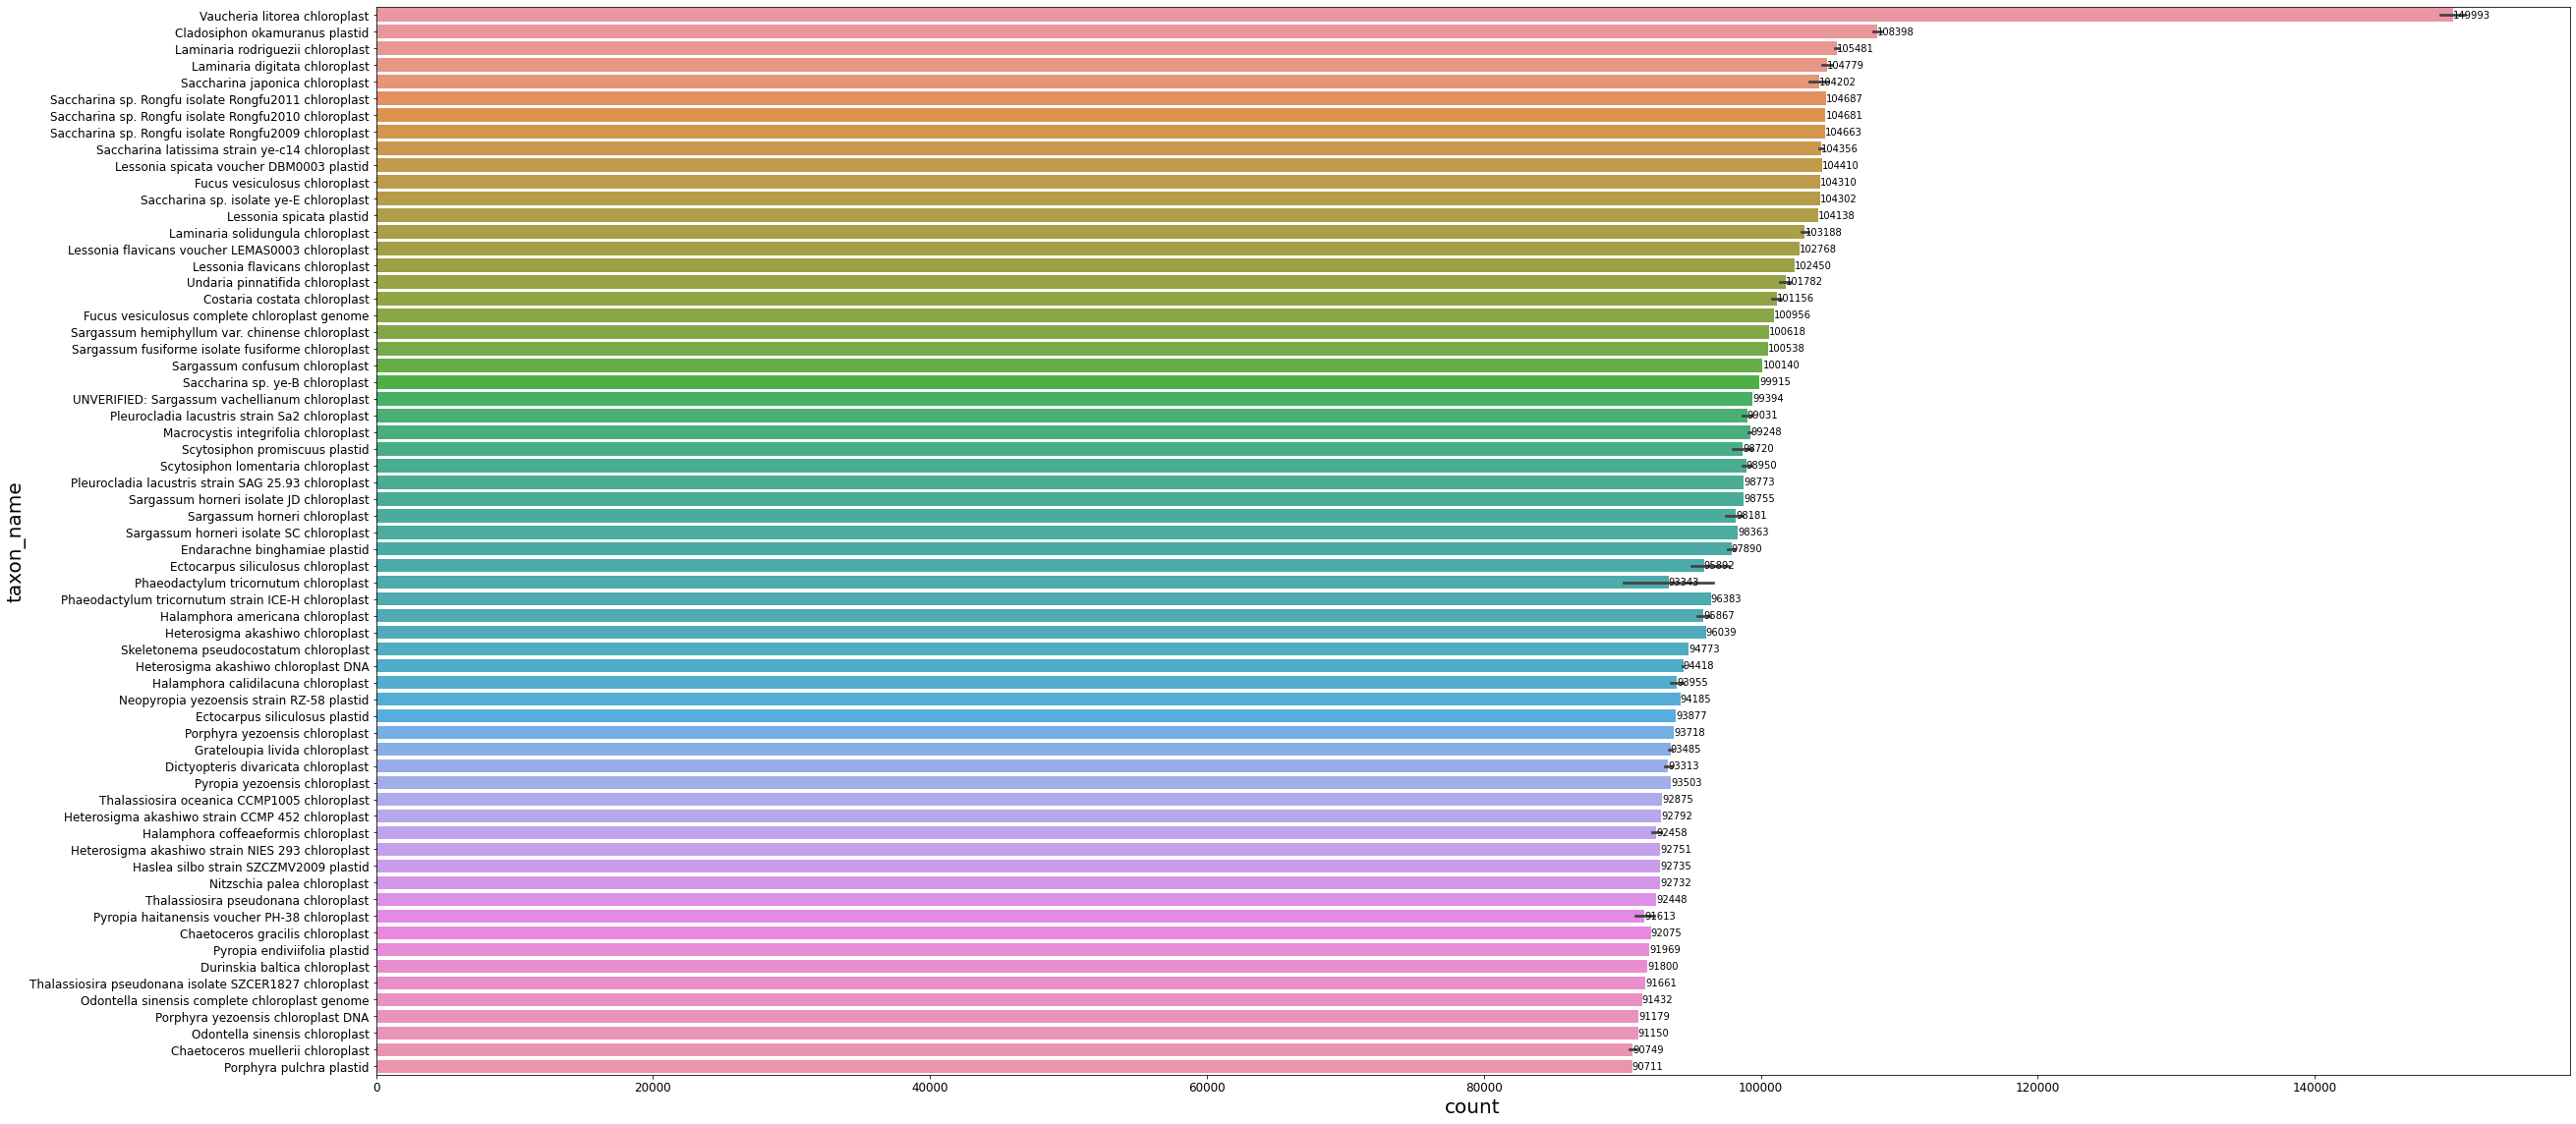

In [32]:
plt.figure(figsize = (40,20))
ax = sns.barplot(y='taxon_name', x='count', data=df[df['count'] >= 90000])
ax.set_xlabel("count",fontsize=20)
ax.set_ylabel("taxon_name",fontsize=20)
ax.tick_params(axis='x', labelsize = 12)
ax.tick_params(axis='y', labelsize = 12)

for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')
    
plt.savefig('03_Nov112020_1e-20.jpeg', dpi=700)

# Filter BLASTn Results (E-Value < 10 ^ -6)

In [8]:
results_target = results.loc[results['e_value'] < 0.000001]

In [9]:
results_target.shape

(48892182, 12)

In [10]:
results_target.to_csv('01_db_blastn_Nov112020_filtered_subj.csv', index=False)

In [21]:
df = pd.read_csv('01_db_blastn_Nov112020_filtered_subj.csv')

In [22]:
df.head()

,query,subject,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
0,A00842:193:HMWFWDRXY:1:2101:18267:1031,NC_028502.1,87.755,147,18,0,1,147,89967,90113,2.770000e-42,172.0
1,A00842:193:HMWFWDRXY:1:2101:18267:1031,KR336545.1,87.755,147,18,0,1,147,89967,90113,2.770000e-42,172.0
2,A00842:193:HMWFWDRXY:1:2101:18267:1031,NC_058274.1,85.714,147,21,0,1,147,84675,84821,2.790000e-37,156.0
3,A00842:193:HMWFWDRXY:1:2101:18267:1031,MW899036.1,85.714,147,21,0,1,147,84675,84821,2.790000e-37,156.0
4,A00842:193:HMWFWDRXY:1:2101:18267:1031,NC_022263.1,86.364,110,11,4,7,113,29549,29441,1.320000e-25,117.0


In [23]:
df.shape

(48892182, 12)

In [24]:
df['subject'].nunique()

9379

In [25]:
base_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/{}"
db = "nuccore"

In [26]:
def get_taxon_name(tax_id):
    try:
        efetch = "efetch.fcgi?db={}&id={}&rettype=json".format(db, tax_id)
        efetch_response = requests.get(base_url.format(efetch))
        efetch_dict = xmltodict.parse(efetch_response.content)
        Definition = efetch_dict['GBSet']['GBSeq']['GBSeq_definition']
        Definition = Definition.split(',')
        Definition = Definition[0]
        time.sleep(0.5)
    except:
        Definition = tax_id
        pass
 
    return Definition

In [27]:
def enrich_dataset(df):
    taxon_value = df['subject']
    ScientificName = get_taxon_name(taxon_value)
    df['taxon_name'] = ScientificName
    return df

In [28]:
df = df['subject'].value_counts()
df = pd.Series(df)
df.to_csv('02_Nov112020-ALL-R1_blastn.csv')

In [29]:
df = pd.read_csv('02_Nov112020-ALL-R1_blastn.csv')
df.columns.values[0] = "subject"
df.columns.values[1] = "count"

In [30]:
df.head()

,subject,count
0,NC_011600.1,163516
1,EU912438.1,161130
2,NC_046005.1,122437
3,MG739403.1,121651
4,NC_057231.1,119767


In [31]:
df.shape

(9379, 2)

In [32]:
%%time
df = df.apply(enrich_dataset, axis=1)

CPU times: user 7min 7s, sys: 31 s, total: 7min 38s
Wall time: 3h 53min 4s


In [33]:
df.to_csv('03_Nov112020-ALL-R1_blastn-TaxaName.csv', index=False)

In [34]:
df = pd.read_csv('03_Nov112020-ALL-R1_blastn-TaxaName.csv')

In [35]:
df.shape

(9379, 3)

In [36]:
df.describe()

,count
count,9379.000000
mean,5212.941891
std,15995.288616
min,1.000000
25%,416.000000
50%,1144.000000
75%,2473.000000
max,163516.000000


In [37]:
df.head(50)

,subject,count,taxon_name
0,NC_011600.1,163516,Vaucheria litorea chloroplast
1,EU912438.1,161130,Vaucheria litorea chloroplast
2,NC_046005.1,122437,Cladosiphon okamuranus plastid
3,MG739403.1,121651,Cladosiphon okamuranus plastid
4,NC_057231.1,119767,Laminaria rodriguezii chloroplast
5,MT732096.1,119417,Laminaria rodriguezii chloroplast
6,NC_044689.1,119170,Laminaria digitata chloroplast
7,NC_018523.1,118666,Saccharina japonica chloroplast
8,MK058526.1,118354,Saccharina sp. Rongfu isolate Rongfu2011 chlor...
9,MK058525.1,118342,Saccharina sp. Rongfu isolate Rongfu2010 chlor...


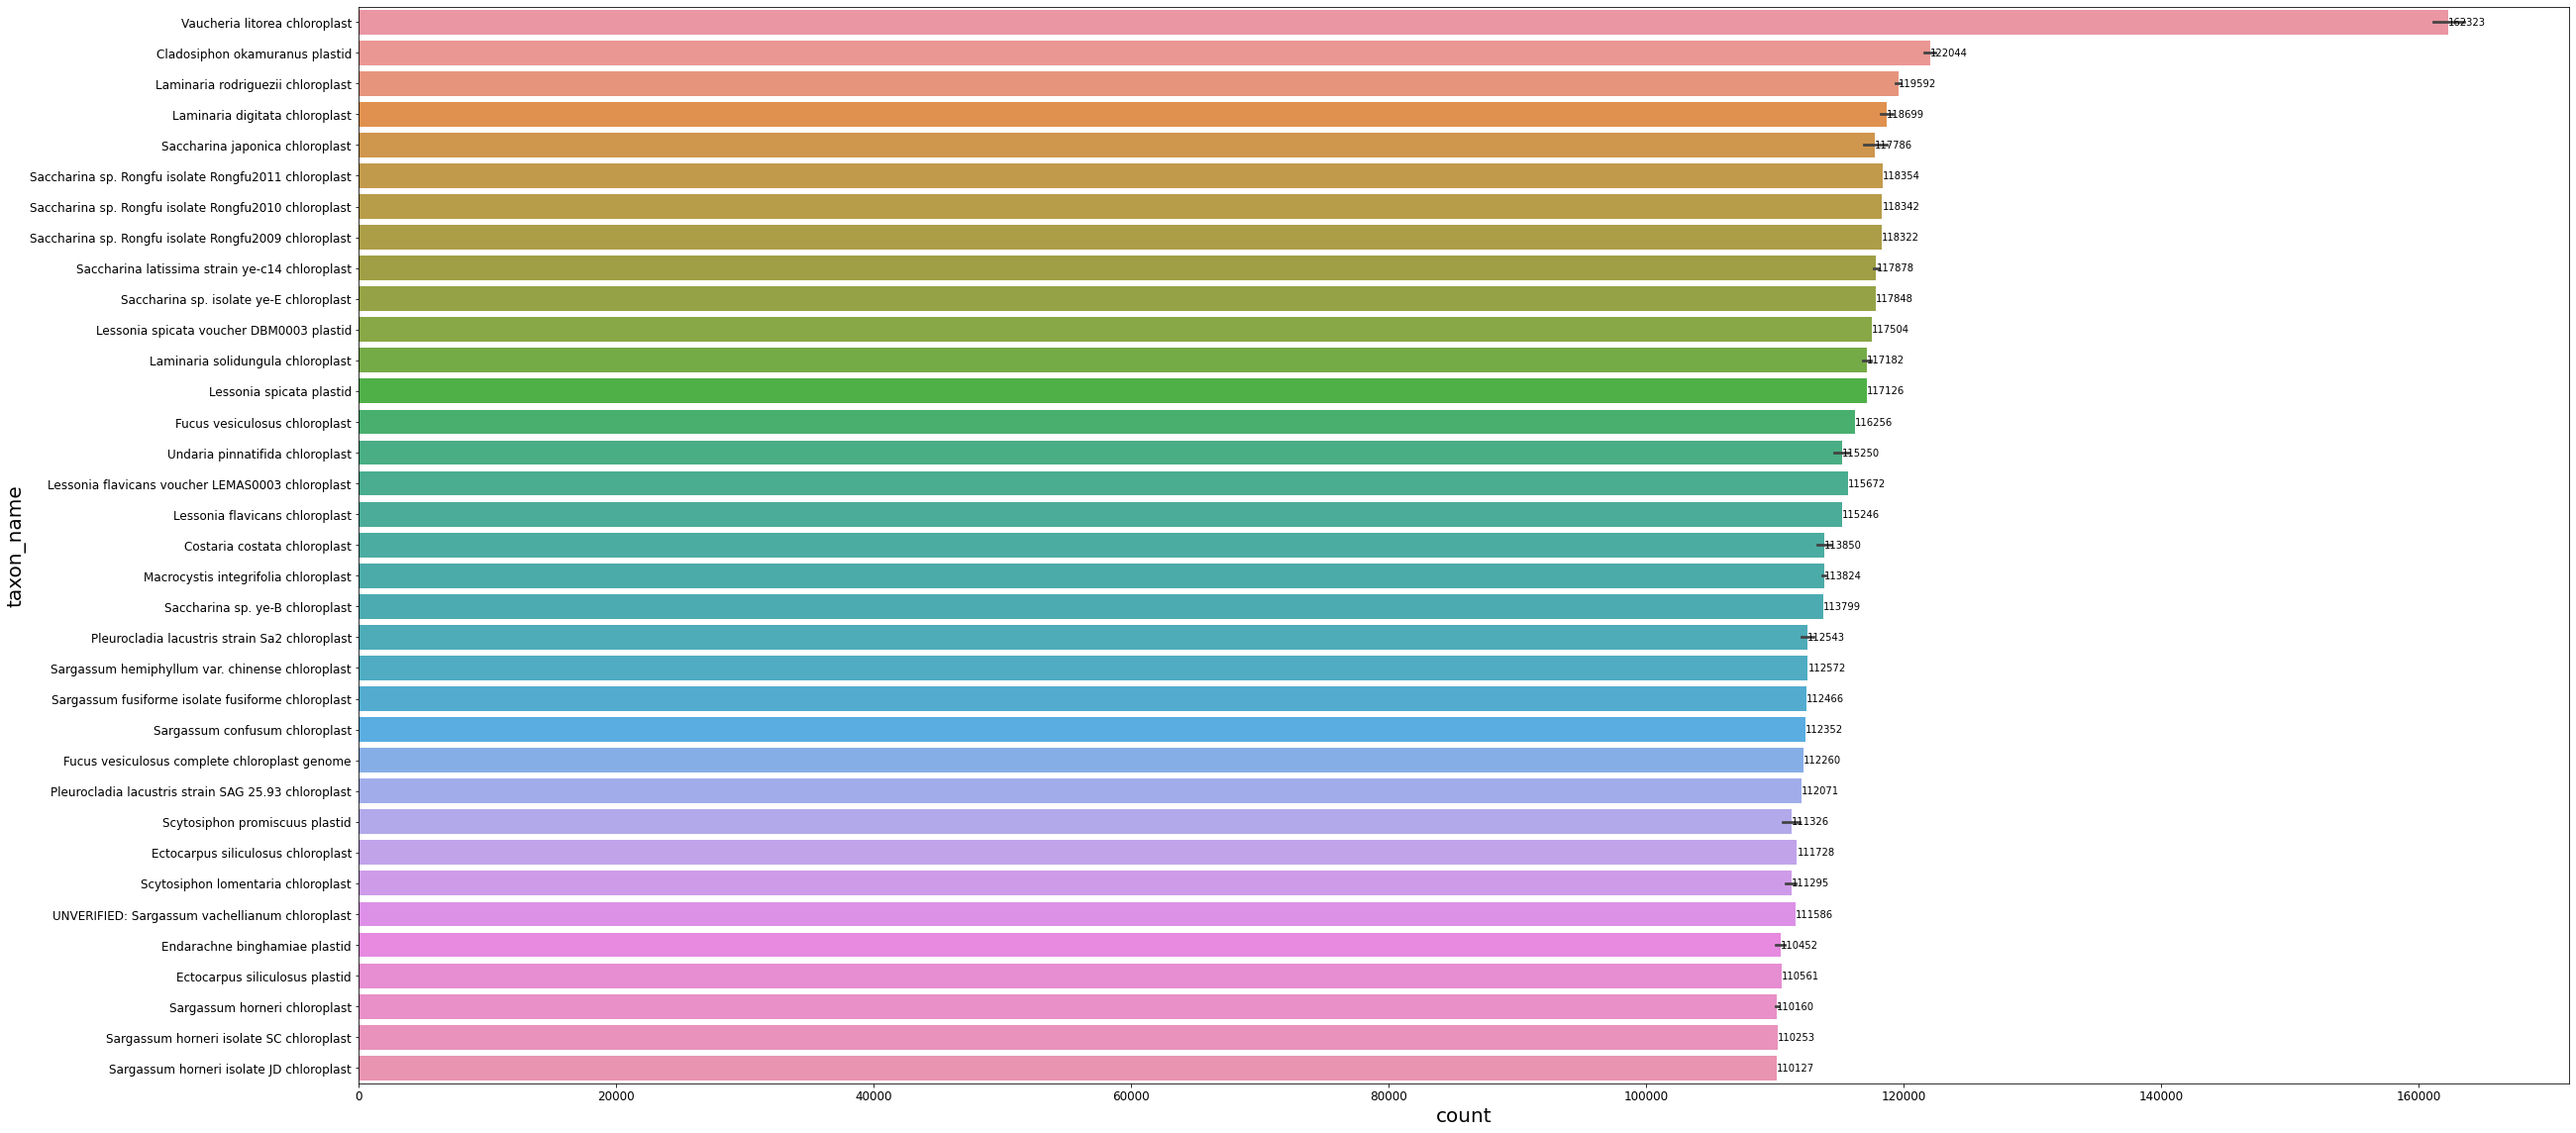

In [39]:
plt.figure(figsize = (40,20))
ax = sns.barplot(y='taxon_name', x='count', data=df[df['count'] >= 110000])
ax.set_xlabel("count",fontsize=20)
ax.set_ylabel("taxon_name",fontsize=20)
ax.tick_params(axis='x', labelsize = 12)
ax.tick_params(axis='y', labelsize = 12)

for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')
    
plt.savefig('03_Nov112020.jpeg', dpi=700)

In [ ]:
# Create a new column describing how long the alignment is on the query sequence
qaln_length = abs(results['query_end'] - results['query_start']) + 1
print(qaln_length)

In [ ]:
# Add qaln_length to the results table as a new column
results['qaln_length'] = qaln_length
results.head()

In [ ]:
# Create a scatterplot
results.plot.scatter('pc_identity', 'e_value')
plt.title("E value vs %identity");              # add a title to the plot

In [ ]:
# SOLUTION - EXERCISE 01
# !! Do not execute this cell if skipping computational step !!

# We can reuse the directories and db, but need to define new input/output filenames
query = os.path.join(datadir, 'lantibiotic.fasta')                                   # query sequence(s)
blastout = os.path.join(outdir, 'lantibiotic_blastx_kitasatospora.tab')              # BLAST output

# Create command-line for BLASTX
cmd_blastx = NcbiblastxCommandline(query=query, out=blastout, outfmt=6, db=db)

# Run BLASTX, and catch STDOUT/STDERR
stdout, stderr = cmd_blastx()

# Check STDOUT, STDERR
print("STDOUT: %s" % stdout)
print("STDERR: %s" % stderr)

In [ ]:
# !! Uncomment the line below, if skipping computational step !!
# blastout = os.path.join('prepped', 'kitasatospora', 'lantibiotic_blastx_kitasatospora.tab')

# Read BLASTX output, and reuse the column headers defined earlier
results = pd.read_csv(blastout, sep="\t", header=None)
results.columns = headers

# Create a scatterplot
results.plot.scatter('bitscore', 'pc_identity')
plt.title("%identity vs bitscore");  